# Gamma and Hadron Particle Classification using Principle Component Analysis (PCA)

A practice project for my Codecademy certified data scientist: machine learning specialist certification, in order to practice implementing principle component analysis (PCA).

Robert Hall

12/29/2024

In [1]:
import pandas as pd
import numpy as np

### 1. Read In Data and Drop Null Values

In [2]:
# Read the csv data as a DataFrame
df = pd.read_csv('./telescope_data.csv', index_col=0)

# Remove null and na values
df.dropna()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


### 2. Extract Column for Labels and Isolate Other Features

In [3]:
# Extract the class classes
classes = df['class']
data_matrix = df.drop(columns=['class'])

# print('Task 2:')
print(data_matrix)

        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  
0       -8.2027  40.0920   81.8828  
1       -9.9574   6.3609  205.2610  
2      -45.2

### 3. Create and Plot a Correlation Heatmap

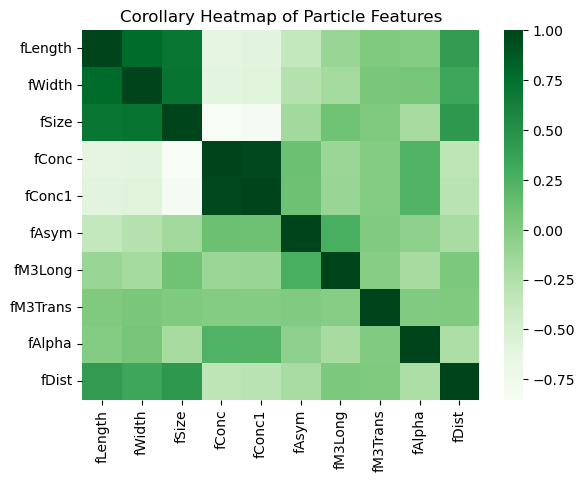

In [6]:
# Use the `.corr()` method on `data_matrix` to get the correlation matrix 
correlation_matrix = data_matrix.corr()

import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('Corollary Heatmap of Particle Features')
plt.show()

### 4. Perform Eigendecomposition On The Correlation Matrix

In [8]:
# Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

# Order the eigenvalues by ordering the indices of the eigenvalues using `argsort`, and use [::-1] to order them from greatest to smallest
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(f"Eigenvalue Shape:   {eigenvalues.shape}")
print(f"Eigenvectors Shape: {eigenvectors.shape}")

Eigenvalues length: 10, Original Number of Features: 10
Eigenvalue Shape:   (10,)
Eigenvectors Shape: (10, 10)


### 5. Find, And Plot, The Information Explained At Each Principle Axis

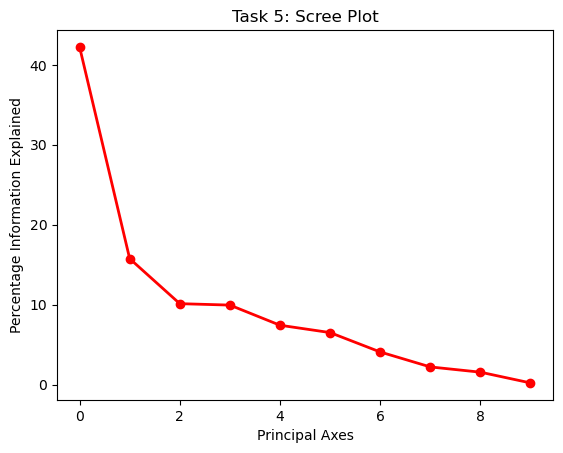

In [10]:
# Find the percentages of information for each eigenvector, which is generated by the proportion of its eigenvalues to the sum of all eigenvalues
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

# Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Task 5: Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percentage Information Explained')
plt.show()

### 6. Find, And Plot, The Cumulative Information Explained At Each Incremental Principle Axis

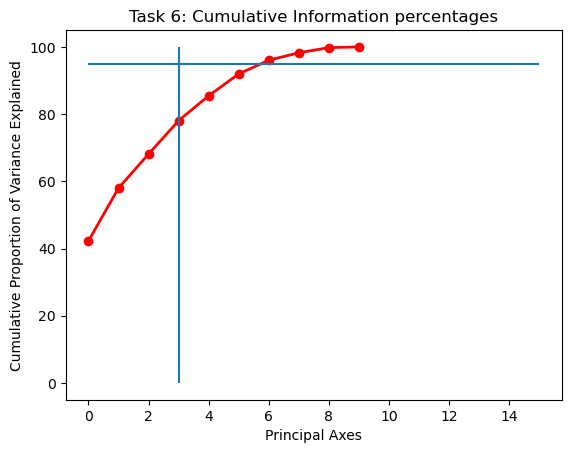

In [11]:
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

# Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Task 6: Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

### 7. Standardize The Data Matrix In Preparation for PCA

In [13]:
mean = data_matrix.mean(axis=0)
stdev = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / stdev
print(data_matrix_standardized.head())

    fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
0 -0.577211 -0.336795 -0.381120  0.062758 -0.148919  0.541028  0.224812   
1 -0.510955 -0.570012 -0.648578  0.820362  1.471737  0.516906  0.260357   
2  2.568210  6.205695  2.615714 -1.875834 -1.773194  2.044938 -1.478497   
3 -0.694749 -0.687241 -1.029451  1.282035  1.606566  0.532757 -0.333506   
4  0.516609  0.476371  0.711138 -0.347497 -0.284652 -0.020200  0.353077   

   fM3Trans    fAlpha     fDist  
0 -0.405831  0.476803 -1.497826  
1 -0.490081 -0.815397  0.153121  
2 -2.182972  1.889174  0.842613  
3 -0.355350 -0.658786 -1.031436  
4  1.036593 -0.881016  2.176369  


### 8. Perform Principal Component Analysis By Fitting and Transforming The Data Matrix

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(data_matrix_standardized)

print(f'Number of features in the data matrix:              {principal_components.shape[1]}')
print(f'Number of features in the principal components:     {data_matrix.shape[1]}')

Number of features in the data matrix:              10
Number of features in the principal components:     10


In [17]:
# Find the eigenvalues from the singular values
singular_values = pca.singular_values_
eigenvalues = singular_values ** 2

# Eigenvectors are in the property `.components_` as row vectors. To turn them into column vectors, transpose them using the NumPy method `.T`.
eigenvectors = pca.fit(data_matrix_standardized).components_.T


In [18]:
# Get the variance ratios from the `explained_variance_ratio_`
principal_axes_variance_ratios = pca.explained_variance_ratio_
principal_axes_variance_percents = principal_axes_variance_ratios * 100

### 9. Reperform PCA Using 2 Components

In [20]:
# Calculating principal components with 2 components
# Initialize a PCA object with 2 components
pca = PCA(n_components=2) 
 
# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)
 
# Print the DataFrame
print(f'Number of Principal Components Features:    {principal_components.shape[1]}')
print(f'Number of Original Data Features:           {data_matrix_standardized.shape[1]}')

Number of Principal Components Features:    2
Number of Original Data Features:           10


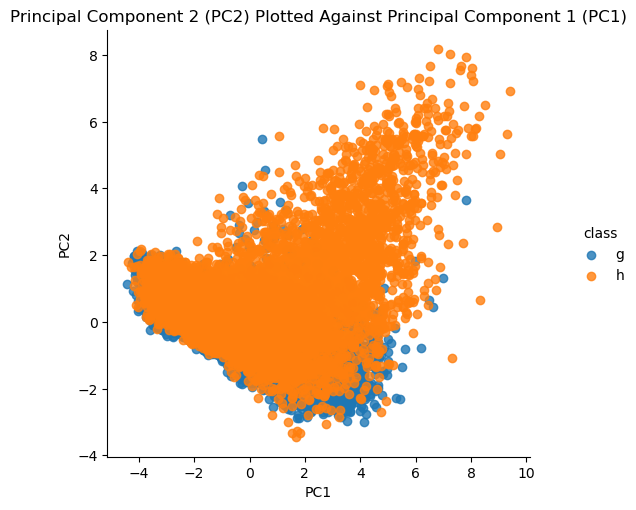

In [23]:
# Plot the principal components as a scatterplot
principal_components_data = pd.DataFrame({
  'PC1': principal_components[:, 0],
  'PC2': principal_components[:, 1],
  'class': classes,
})

sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.title("Principal Component 2 (PC2) Plotted Against Principal Component 1 (PC1)")
plt.show()

### 10. Fit The Transformed Features Onto A Support Vector Classifier And Score The Model

In [33]:
# build PCA model 1
pca_1 = PCA(n_components=2) 

# define X features and y target
y = classes.astype('category').cat.codes
X = pca_1.fit_transform(data_matrix_standardized)

# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# build SVC and fit training data 
from sklearn.svm import LinearSVC
svc_1 = LinearSVC(random_state=0, tol=1e-5, max_iter = 10000)
svc_1.fit(X_train_1, y_train_1) 

LinearSVC(max_iter=10000, random_state=0, tol=1e-05)

### 11. Fit First Two Dataset Features Onto A Likewise Support Vector Classifier To Cross-Evaluate Performance

In [37]:
# Using the original features 
# Select first two features from the original data
X_original = data_matrix_standardized.iloc[:, [0, 1]]
 
# Split the data intro 33% testing and the rest training
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_original, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0, max_iter=10000)
svc_2.fit(X_train_2, y_train_2)

LinearSVC(max_iter=10000, random_state=0)

### 12. Evaluate Difference In SVC Model Score On PCA-Selected Features Versus First Two Sequential Features

In [35]:
score_1 = svc_1.score(X_test_1, y_test_1)
print(f'Score for model with 2 PCA features: {score_1}')

Score for model with 2 PCA features: 0.7417556157400031


In [38]:
# Generate a score for the testing data
score_2 = svc_2.score(X_test_2, y_test_2)
print(f'Score for model with 2 original features: {score_2}')

Score for model with 2 original features: 0.7192926557272582


### In Sum:

* PCA has increased the model score by approimately 0.02 points by extracting most informative features from the dataset
